In [1]:
import csv
import numpy as np
import pandas as pd
from PIL import Image
import PIL
import os, sys
import torch

from helper import *

c:\programdata\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
commonGenes = []
set2 = []
set3 = []

dataset1 = open('datasets/GSE63060.csv', newline='')
dataset2 = open('datasets/GSE63061.csv', newline='')
dataset3 = open('datasets/GSE140829.csv', newline='')

reader1 = csv.reader(dataset1, delimiter="\t")
reader2 = csv.reader(dataset2, delimiter="\t")
reader3 = csv.reader(dataset3, delimiter="\t")

for row in reader2:
    set2.append(row[0])
    
for row in reader3:
    set3.append(row[0])

for row in reader1:
    if row[0] in set2 and row[0] in set3:
        commonGenes.append(row[0])

dataset1.close()
dataset2.close()
dataset2.close()

In [3]:
print(len(commonGenes))

10678


In [4]:
set1 = []
set2 = []
set3 = []

dataset1 = open('datasets/GSE63060.csv', newline='')
dataset2 = open('datasets/GSE63061.csv', newline='')
dataset3 = open('datasets/GSE140829.csv', newline='')

reader1 = csv.reader(dataset1, delimiter="\t")
reader2 = csv.reader(dataset2, delimiter="\t")
reader3 = csv.reader(dataset3, delimiter="\t")

for row in reader1:
    if row[0] in commonGenes and row not in set1:
        set1.append(row)
        
for row in reader2:
    if row[0] in commonGenes and row not in set2:
        set2.append(row)
        
for row in reader3:
    if row[0] in commonGenes and row not in set3:
        set3.append(row)
    
set1.sort(key=lambda x: x[0])
set2.sort(key=lambda x: x[0])
set3.sort(key=lambda x: x[0])

data1 = []
data2 = []
data3 = []
    
for i in range(len(set1[0])):
    rowData = []

    for row in set1:
        rowData.append(row[i])

    data1.append(rowData)
    
for i in range(len(set2[0])):
    rowData = []

    for row in set2:
        rowData.append(row[i])

    data2.append(rowData)
    
for i in range(len(set3[0])):
    rowData = []

    for row in set3:
        rowData.append(row[i])

    data3.append(rowData)

dataset1.close()
dataset2.close()
dataset3.close()

In [5]:
print(len(data3[0]))

10678


In [6]:
with open('datasets/data1.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(data1)

In [7]:
with open('datasets/data2.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(data2)

In [8]:
with open('datasets/data3.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(data3)

In [9]:
conditions = {}

dataset1 = open('datasets/GSE63060info.csv', newline='')
dataset2 = open('datasets/GSE63061info.csv', newline='')
dataset3 = open('datasets/GSE140829info.csv', newline='')

reader1 = csv.DictReader(dataset1, delimiter="\t")
reader2 = csv.DictReader(dataset2, delimiter="\t")
reader3 = csv.DictReader(dataset3, delimiter="\t")

conData = []

for row in reader1:
    conData.append(row)
        
for row in reader2:
    conData.append(row)
    
for row in reader3:
    conData.append(row)
    
conditions = merge(conData[0], conData[1])
conditions = merge(conditions, conData[2])

dataset1.close()
dataset2.close()
dataset3.close()

In [10]:
for i in range(len(data1[0])):
    if data1[0][i] != data2[0][i]:
        print(data1[0][i])
        print(i)
        break

In [11]:
if data1[0][0] == "ID_REF":
    del data1[0]

if data2[0][0] == "ID_REF":
    del data2[0]

if data3[0][0] == "ID_REF":
    del data3[0]

In [12]:
for i in range(len(data1)):
    try:
        if data1[i][0] not in conditions.keys():
            print(data1[i][0])
            print(i)
            
            del data1[i]
    except:
        pass

4856076038_D
208


In [13]:
import random

random.shuffle(data1)
random.shuffle(data2)
random.shuffle(data3)

In [14]:
EXCLUDE = "MCI"

In [15]:
i = 0

while i < len(data1):
    if conditions[data1[i][0]] == EXCLUDE:
        data1.pop(i)
    
    else:
        i += 1

In [16]:
i = 0

while i < len(data2):
    if conditions[data2[i][0]] == EXCLUDE:
        data2.pop(i)
    
    else:
        i += 1

In [17]:
i = 0

while i < len(data3):
    if conditions[data3[i][0]] == EXCLUDE:
        data3.pop(i)
    
    else:
        i += 1

In [18]:
def getCondition(cstr):
    if cstr == "AD":
        return(1)
    elif cstr == "CTL":
        return(0)
    else:
        return(None)

In [19]:
def toFloat(data):
    for i in range(len(data)):
        for j in range(1, len(data[0])):
            data[i][j] = float(data[i][j])
            
    return data

In [20]:
def getMean(data):
    mean = []
    
    for j in range(len(data[0]) - 1):
        total = 0.0
        
        for i in range(len(data)):
            total += data[i][j + 1]
            
        mean.append(total / len(data))
        
    return mean

In [21]:
def getVariance(data):
    variance = []
    
    for j in range(len(data[0]) - 1):
        total = 0.0
        
        for i in range(len(data)):
            total += abs(data[i][j + 1])
            
        variance.append(total / len(data))
        
    return variance

In [22]:
def getRowMean(data):
    mean = []
    
    for i in range(len(data)):
        total = 0.0
        
        for j in range(1, len(data[i])):
            total += data[i][j]
            
        mean.append(total / (len(data[i]) - 1))
        
    return mean

In [23]:
def getRowVariance(data):
    mean = []
    
    for i in range(len(data)):
        total = 0.0
        
        for j in range(1, len(data[i])):
            total += abs(data[i][j])
            
        mean.append(total / (len(data[i]) - 1))
        
    return mean

In [24]:
def normalize(data):
    mean = getMean(data)
    
    for j in range(len(data[0]) - 1):
        for i in range(len(data)):
            data[i][j + 1] -= mean[j]
            
    variance = getVariance(data)
    
    for j in range(len(data[0]) - 1):
        for i in range(len(data)):
            data[i][j + 1] /= variance[j]
            data[i][j + 1] /= 8
            data[i][j + 1] += 1

    return data

In [25]:
def normalizeRow(data):
    mean = getMean(data)
    
    for i in range(len(data)):
        for j in range(len(data[0]) - 1):
            data[i][j + 1] -= mean[j]
            
    variance = getVariance(data)
    
    for i in range(len(data)):
        for j in range(len(data[0]) - 1):
            data[i][j + 1] /= variance[j]
            data[i][j + 1] /= 8
            data[i][j + 1] += 1

    return data

In [26]:
data1 = toFloat(data1)
data2 = toFloat(data2)
data3 = toFloat(data3)

In [27]:
data1 = normalizeRow(data1)
data1 = normalizeRow(data1)
data1 = normalizeRow(data1)

data1 = normalize(data1)
data2 = normalize(data2)
data3 = normalize(data3)

In [28]:
data = data1 + data2 + data3
data = normalize(data)
random.shuffle(data)

In [29]:
print(len(data[0]))

10678


4856050003_J


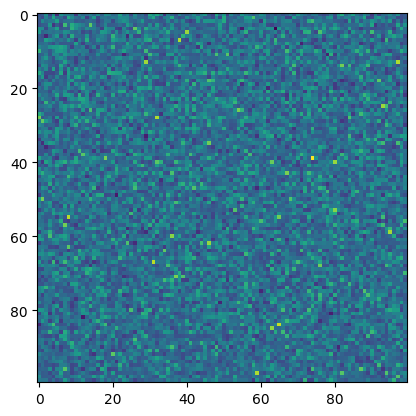

In [30]:
import matplotlib.pyplot as plt

print(data1[0][0])
plt.imshow(torch.Tensor(data1[1][1:10001]).view(100, 100))

In [31]:
for item in data:
    try:
        item[0] = getCondition(conditions[item[0]])
    except:
        pass

In [32]:
ad = 0
ctl = 0

for i in range(len(data)):
    if data[i][0] == 1:
        ad += 1
    else:
        ctl += 1

In [33]:
print(ad)
print(ctl)

483
468


In [34]:
rValues = getRValuesNoTest(data, conditions, ctl, ad)

In [35]:
FINAL_LEN = 1024
BLOCK_SIZE = 128
STEP_SIZE = 8

In [36]:
rLen = FINAL_LEN * STEP_SIZE

del rValues[rLen:]
random.shuffle(rValues)
print(len(rValues))

8192


In [37]:
sortedData = []

for i in range(len(data)):
    rowData = []
    
    for j in range(len(rValues)):
        rowData.append(data[i][rValues[j][0] + 1])
    
    rowData.extend(rowData)
    rowData.insert(0, data[i][0])
    
    sortedData.append(rowData)

In [38]:
print(len(rowData))
print(len(sortedData))

16385
951


In [39]:
with open('datasets/data.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(sortedData)

In [40]:
headers = ['labels'] + list(range(len(rValues) * 2))

data = pd.read_csv('datasets/data.csv', names=headers)

In [41]:
X = data.drop(['labels'], axis=1)
y = data["labels"]

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

LDAData = [list(y)]

for i in range(FINAL_LEN):
    X_Sub = X[list(range(STEP_SIZE * i, STEP_SIZE * i + BLOCK_SIZE))]
    
    lda_model = LDA(n_components = 1)
    X_lda = lda_model.fit_transform(X_Sub, y)
    
    LDAData.append(X_lda)

In [43]:
print(len(LDAData), len(y))

1025 951


In [44]:
data = []

In [45]:
for i in range(len(LDAData[0])):
    rowData = []

    for row in LDAData:
        rowData.append(float(row[i]))

    data.append(rowData)

In [46]:
rValues = getRValuesNoTest(data, conditions, ctl, ad)

In [47]:
sortedData = []

for i in range(len(data)):
    rowData = []
    
    for j in range(len(rValues)):
        rowData.append(data[i][rValues[j][0] + 1])
        
    rowData.insert(0, data[i][0])
    
    sortedData.append(rowData)

In [48]:
data = normalize(data)

In [49]:
train = data[:761]
test = data[761:]

In [50]:
print(len(test))
print(len(train))

190
761


In [51]:
print(len(train[0]))

1025


In [52]:
with open('datasets/train.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(train)
    
with open('datasets/test.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(test)

In [53]:
print(len(test))

190


In [54]:
print(len(train))

761
